In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
 
from pandas import DataFrame

In [8]:
#Importing the dataset and having a review of the attributes and data in it.
filename= "C:\\Users\\Gihan\\Downloads\\train.csv"

df= pd.read_csv(filename)

df.head(999)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [9]:
df.shape

(891, 12)

In [10]:
# Quick review of the data types and null counts in the dataset to understand the data preprocessing 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [11]:
#Analysing the null values count in the dataset

df.isnull().sum().sort_values(ascending=False)


Cabin          687
Age            177
Embarked         2
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
SibSp            0
Parch            0
Ticket           0
Fare             0
dtype: int64

In [12]:
#Identify the numeric data in the dataset from .describe()  function. 
#This gives us a overview understanding of count/mean/ standard deviation and central tendencies of the data
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [13]:
#Seperating the numeric columns
df.describe().columns

Index(['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare'], dtype='object')

# Sex

In [14]:
#Value counts of the sex column

df['Sex'].value_counts(dropna=False)

male      577
female    314
Name: Sex, dtype: int64

In [15]:
#Analysing the mean rate of survival by gender
df[['Sex','Survived']].groupby('Sex', as_index=False).mean().sort_values(by='Survived', ascending=False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


Text(0, 0.5, 'Probability of Survival')

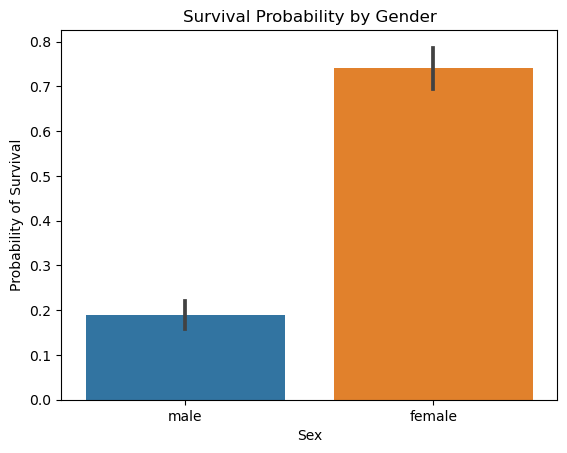

In [16]:
sns.barplot(x='Sex',y='Survived', data=df)
plt.title('Survival Probability by Gender')
plt.ylabel('Probability of Survival')

# Pclass

In [17]:
#Calculating the Value counts of the Pclass column

df['Pclass'].value_counts(dropna=False)

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [18]:
#Analysing the mean rate of survival by Pclass
df[['Pclass','Survived']].groupby('Pclass', as_index=False).mean().sort_values(by='Survived', ascending=False)

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


Text(0, 0.5, 'Probability of Survival')

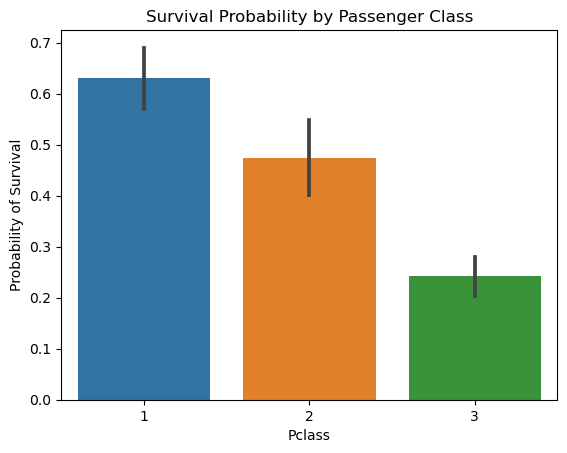

In [19]:
sns.barplot(x='Pclass',y='Survived', data=df)
plt.title('Survival Probability by Passenger Class')
plt.ylabel('Probability of Survival')

c:\Users\Gihan\Anaco\lib\site-packages\seaborn\categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


Text(42.01494444444444, 0.5, 'Probability of Survival')

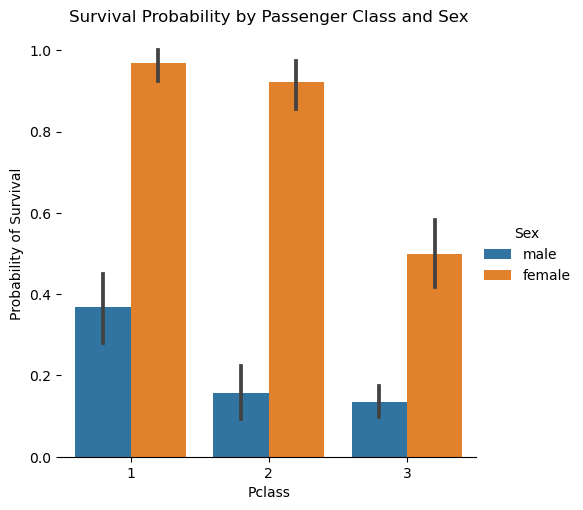

In [20]:
#Visualizing Survival rate by passenger class and sex

ps=sns.factorplot(x='Pclass',y='Survived', hue= 'Sex',kind='bar', data=df)
ps.despine(left = True)
plt.title('Survival Probability by Passenger Class and Sex')
plt.ylabel('Probability of Survival')


Embarked

In [21]:
#Calculating the Value counts of the Embarked column

df['Embarked'].value_counts(dropna=False)

S      644
C      168
Q       77
NaN      2
Name: Embarked, dtype: int64

In [22]:
#Analysing the mean rate of survival by Embarkation
df[['Embarked','Survived']].groupby('Embarked', as_index=False).mean().sort_values(by='Survived', ascending=False)

,Embarked,Survived
0,C,0.553571
1,Q,0.389610
2,S,0.336957


Text(0, 0.5, 'Probability of Survival')

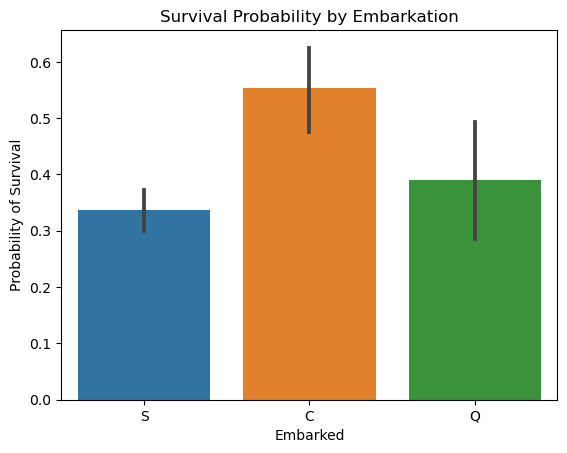

In [23]:
sns.barplot(x='Embarked',y='Survived', data=df)
plt.title('Survival Probability by Embarkation')
plt.ylabel('Probability of Survival')

c:\Users\Gihan\Anaco\lib\site-packages\seaborn\categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


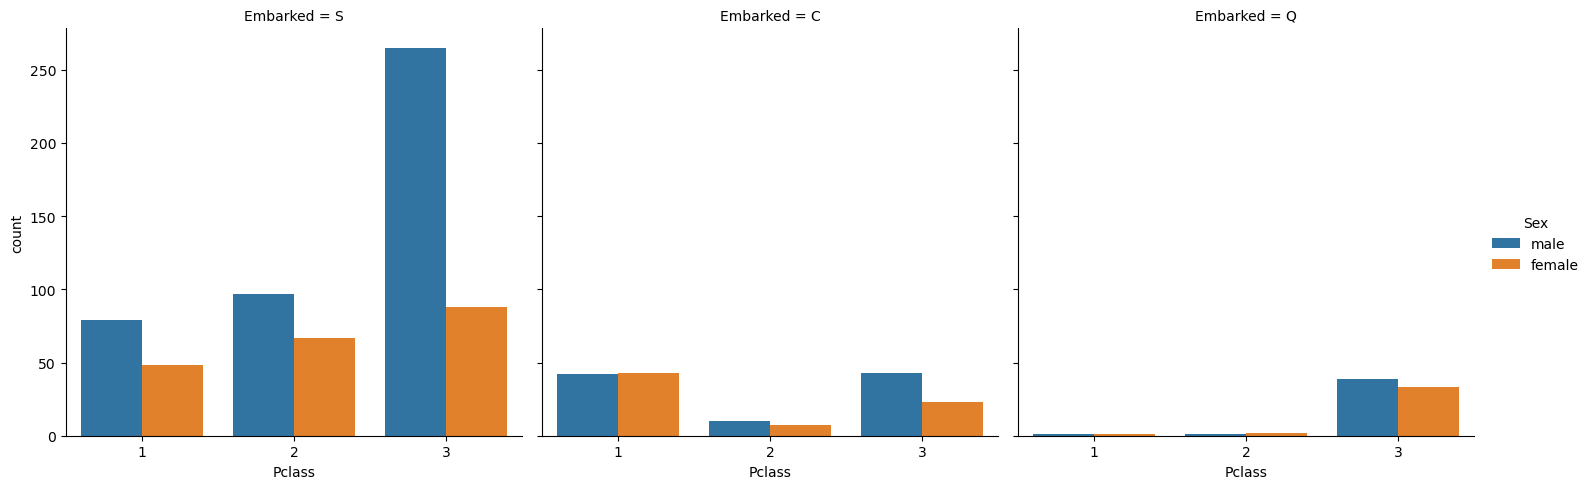

In [24]:
#Analysing the comparison of Embarked location and Passenger class by Gender
sns.factorplot(x='Pclass',col='Embarked', hue= 'Sex',kind='count', data=df)


# SIbSp

In [25]:
#Calculating the Value counts of the SibSp column

df['SibSp'].value_counts(dropna=False)

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

In [26]:
#Analysing the mean rate of survival by SibSp
df[['SibSp','Survived']].groupby('SibSp', as_index=False).mean().sort_values(by='Survived', ascending=False)

,SibSp,Survived
1,1,0.535885
2,2,0.464286
0,0,0.345395
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


Text(0, 0.5, 'Probability of Survival')

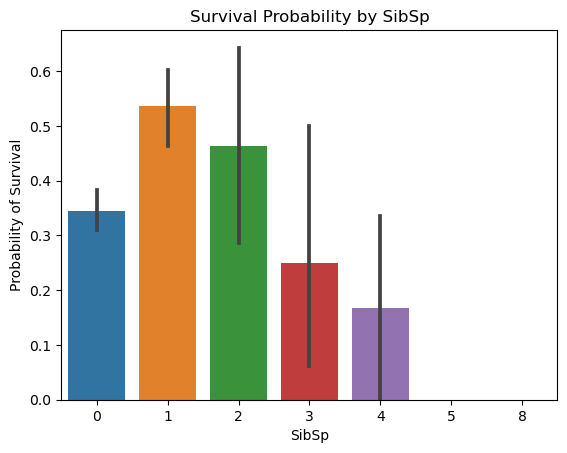

In [27]:
sns.barplot(x='SibSp',y='Survived', data=df)
plt.title('Survival Probability by SibSp')
plt.ylabel('Probability of Survival')

# Parch

In [28]:
#Calculating the Value counts of the Parch column

df['Parch'].value_counts(dropna=False)

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64

In [29]:
#Analysing the mean rate of survival by Parch
df[['Parch','Survived']].groupby('Parch', as_index=False).mean().sort_values(by='Survived', ascending=False)

,Parch,Survived
3,3,0.600000
1,1,0.550847
2,2,0.500000
0,0,0.343658
5,5,0.200000
4,4,0.000000
6,6,0.000000


Text(0, 0.5, 'Probability of Survival')

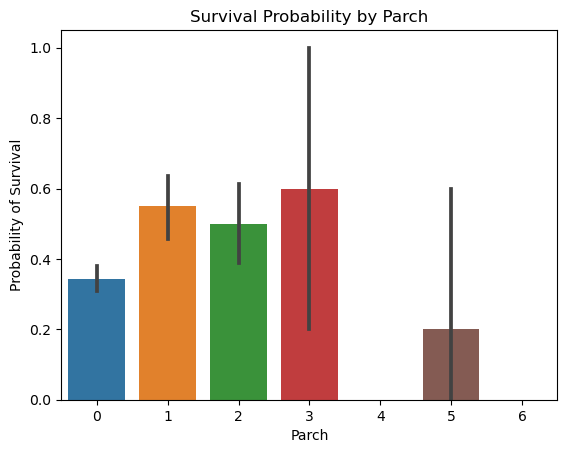

In [30]:
sns.barplot(x='Parch',y='Survived', data=df)
plt.title('Survival Probability by Parch')
plt.ylabel('Probability of Survival')

# Age

In [31]:
#Calculating the Value counts of the Age column

df['Age'].value_counts(dropna=False)

NaN      177
24.00     30
22.00     27
18.00     26
28.00     25
        ... 
36.50      1
55.50      1
0.92       1
23.50      1
74.00      1
Name: Age, Length: 89, dtype: int64

In [32]:
df[['Age','Survived']].groupby('Age', as_index=False).mean().sort_values(by='Survived', ascending=False)

,Age,Survived
0,0.42,1.0
9,5.00,1.0
79,63.00,1.0
68,53.00,1.0
1,0.67,1.0
...,...,...
37,28.50,0.0
49,36.50,0.0
46,34.50,0.0
26,20.50,0.0


In [33]:
#Calculating null values in the Age column

df['Age'].isnull().sum()

177

c:\Users\Gihan\Anaco\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


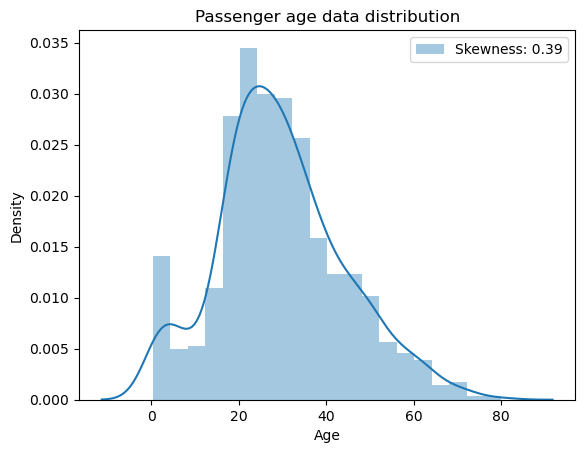

In [34]:
# Vusualizing passenger age data distribution 
sns.distplot(df['Age'],label= 'Skewness: %.2f'%(df['Age'].skew()))
plt.title('Passenger age data distribution')
plt.legend(loc='best')

c:\Users\Gihan\Anaco\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\Users\Gihan\Anaco\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


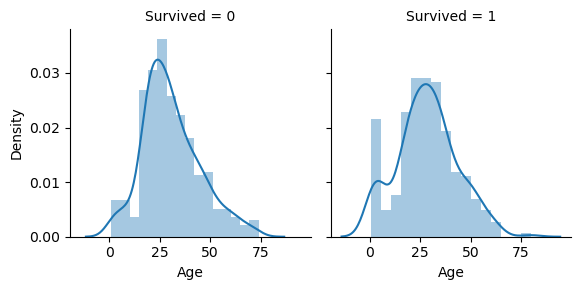

In [35]:
# Vusualizing passenger age data distribution by survival

age_sur= sns.FacetGrid(df,col='Survived')
age_sur.map(sns.distplot,'Age') 


Text(0.5, 1.0, 'Passenger Age Data Distribution by Survival')

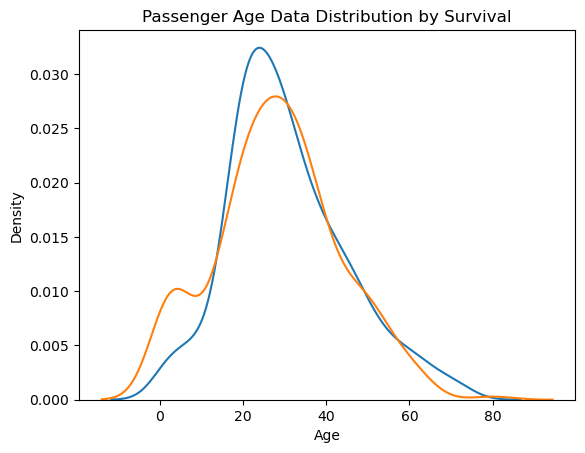

In [36]:
sns.kdeplot(df['Age'][df['Survived'] ==0], label= 'Not Survived')
sns.kdeplot(df['Age'][df['Survived'] ==1], label= 'Survived')
plt.xlabel('Age')
plt.title('Passenger Age Data Distribution by Survival')

# Fare

In [37]:
#Calculating the Value counts of the Fare column

df['Fare'].value_counts(dropna=False)

8.0500     43
13.0000    42
7.8958     38
7.7500     34
26.0000    31
           ..
35.0000     1
28.5000     1
6.2375      1
14.0000     1
10.5167     1
Name: Fare, Length: 248, dtype: int64

In [38]:
#Analysing the mean rate of survival by Fare
df[['Fare','Survived']].groupby('Fare', as_index=False).mean().sort_values(by='Survived', ascending=False)

,Fare,Survived
247,512.3292,1.0
196,57.9792,1.0
89,13.8583,1.0
88,13.7917,1.0
86,13.4167,1.0
...,...,...
103,15.5500,0.0
180,47.1000,0.0
179,46.9000,0.0
178,42.4000,0.0


c:\Users\Gihan\Anaco\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


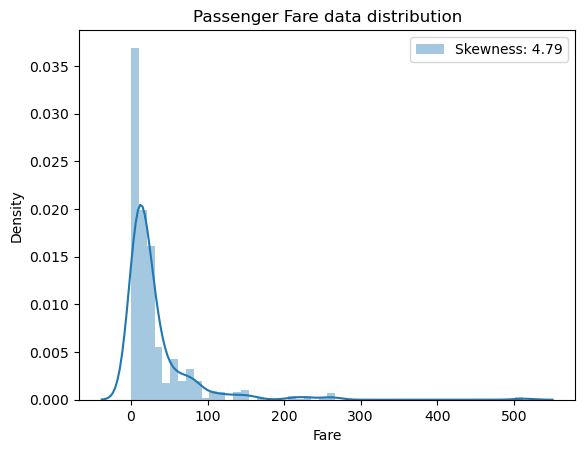

In [39]:
# Visualizing passenger fare data distribution 
sns.distplot(df['Fare'],label= 'Skewness: %.2f'%(df['Fare'].skew()))
plt.title('Passenger Fare data distribution')
plt.legend(loc='best')

In [40]:
#Dividing the numerical data and categorical data columns to overview

df_numerical_data = df[['Age','SibSp', 'Parch','Fare']]
df_categorical_data = df[['Survived','Pclass','Sex','Ticket','Cabin','Embarked']]

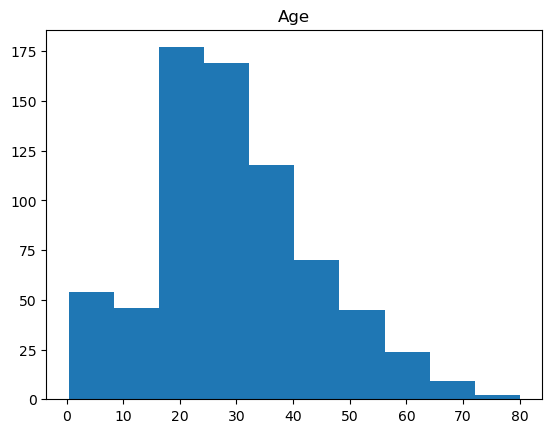

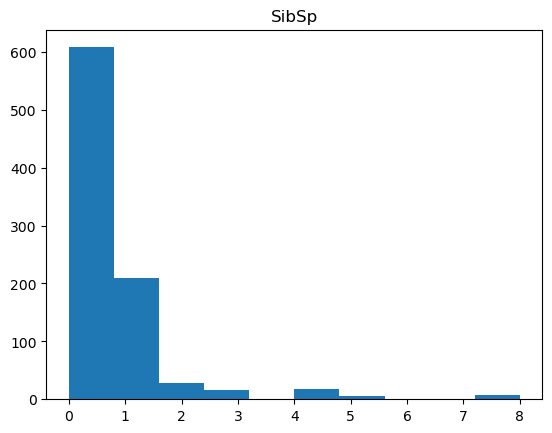

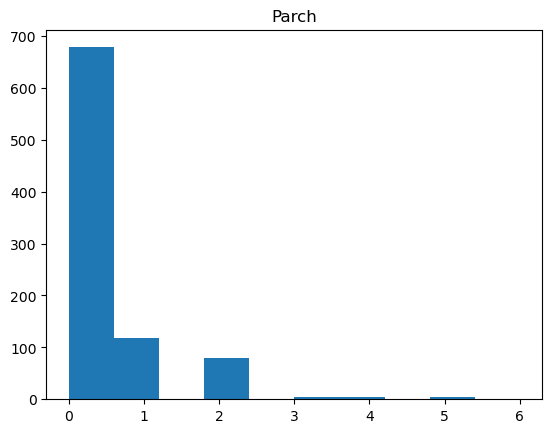

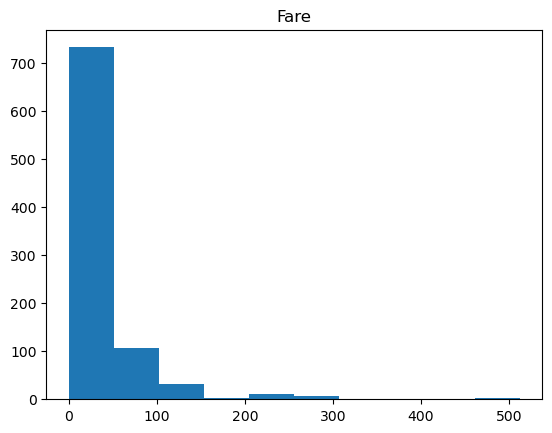

In [41]:
#Illustrating histrograms for all the numerical variables of the dataset
for i in df_numerical_data.columns:
    plt.hist(df_numerical_data[i])
    plt.title(i)
    plt.show()

            Age     SibSp     Parch      Fare
Age    1.000000 -0.308247 -0.189119  0.096067
SibSp -0.308247  1.000000  0.414838  0.159651
Parch -0.189119  0.414838  1.000000  0.216225
Fare   0.096067  0.159651  0.216225  1.000000


<AxesSubplot:>

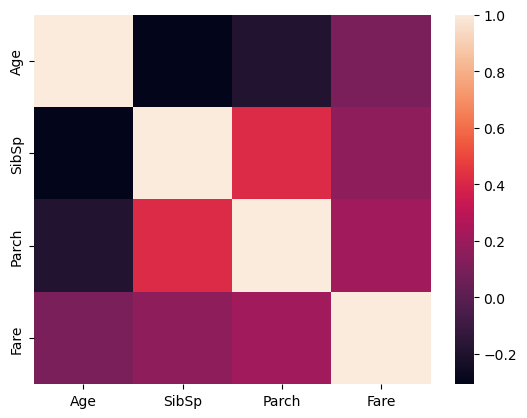

In [42]:
#Finding co-relations through vizualizing in a heatmap
print(df_numerical_data.corr())
sns.heatmap(df_numerical_data.corr())

In [43]:
#Contrast the Survival rate within  Age,SibSp, Parch,Fare

pd.pivot_table(df, index='Survived', values=['Age','SibSp','Parch',])

,Age,Parch,SibSp
Survived,,,
0,30.626179,0.329690,0.553734
1,28.343690,0.464912,0.473684


c:\Users\Gihan\Anaco\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


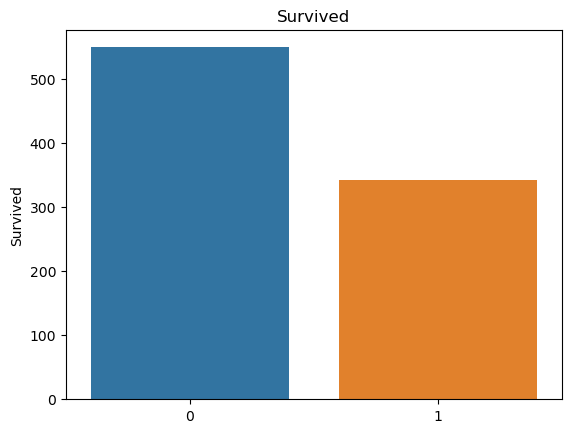

c:\Users\Gihan\Anaco\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


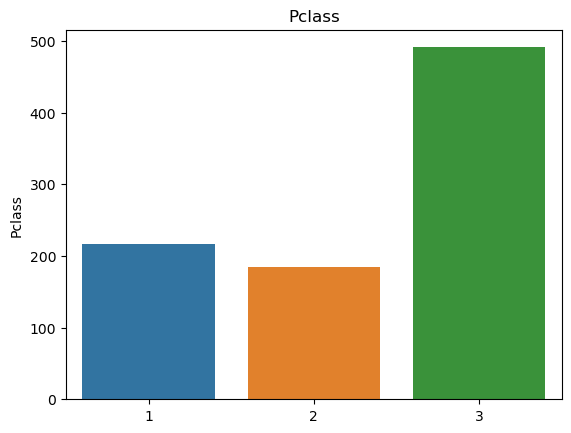

c:\Users\Gihan\Anaco\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


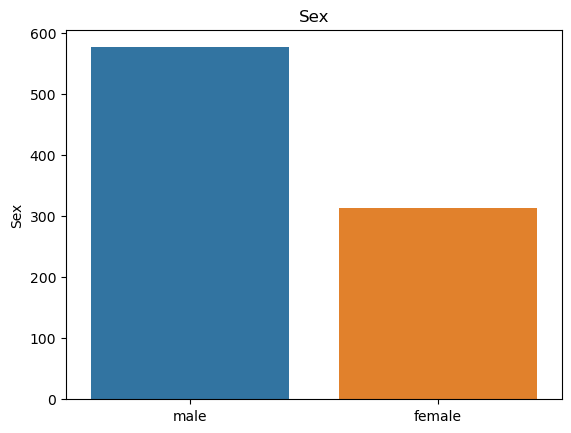

c:\Users\Gihan\Anaco\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


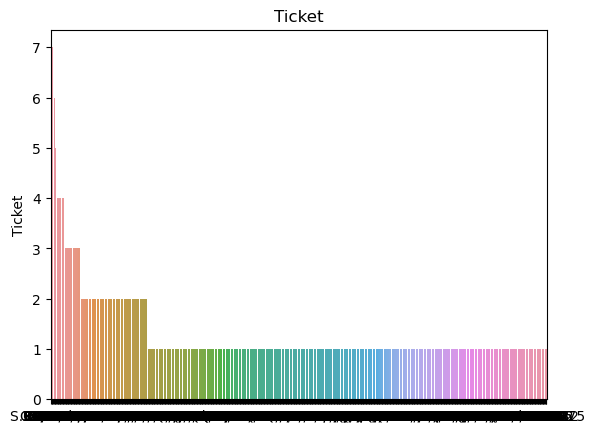

c:\Users\Gihan\Anaco\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


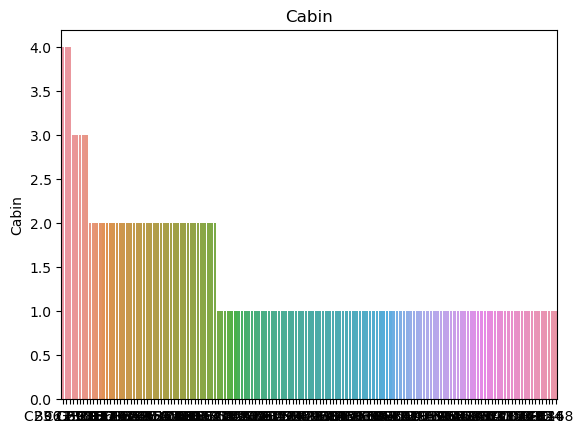

c:\Users\Gihan\Anaco\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


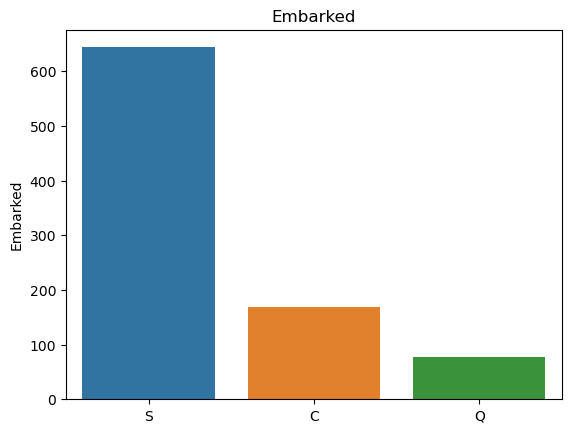

In [44]:
#Illustrating histrograms for all the categorical variables of the dataset
for i in df_categorical_data.columns:
    sns.barplot(df_categorical_data[i].value_counts().index,df_categorical_data[i].value_counts()).set_title(i)
    plt.show()

In [45]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [46]:
#Contrasting the number of survival and each of the categorical columns of the dataset

print(pd.pivot_table(df,index='Survived', columns= 'Pclass',values='Ticket', aggfunc='count'))
print()
print(pd.pivot_table(df,index='Survived', columns= 'Sex',values='Ticket', aggfunc='count'))
print()
print(pd.pivot_table(df,index='Survived', columns= 'Embarked',values='Ticket', aggfunc='count'))
print()

Pclass      1   2    3
Survived              
0          80  97  372
1         136  87  119

Sex       female  male
Survived              
0             81   468
1            233   109

Embarked   C   Q    S
Survived             
0         75  47  427
1         93  30  217



<AxesSubplot:xlabel='Survived', ylabel='count'>

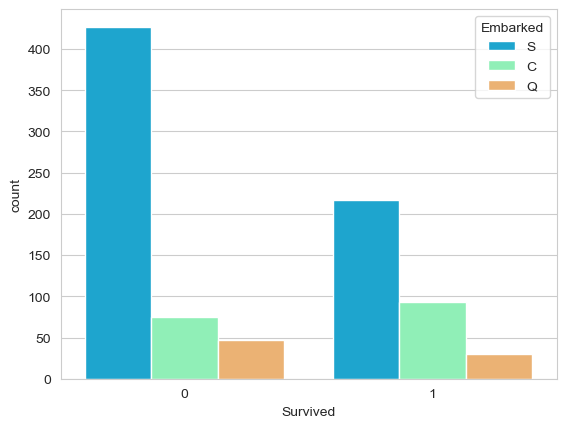

In [47]:
sns.set_style('whitegrid')
sns.countplot(x='Survived', hue= 'Embarked', data=df, palette='rainbow')

In [48]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [49]:
df_categorical_data.Cabin
df['cabin_multiple'] = df.Cabin.apply(lambda x:0 if pd.isna(x) else len(x.split(' ')))

# after looking at this, we might want to look at cabin by letter or number
df['cabin_multiple'].value_counts()

0    687
1    180
2     16
3      6
4      2
Name: cabin_multiple, dtype: int64

In [50]:
pd.pivot_table(df, index='Survived', columns='cabin_multiple', values='Ticket', aggfunc='count')

cabin_multiple,0,1,2,3,4
Survived,,,,,
0,481.0,58.0,7.0,3.0,NaN
1,206.0,122.0,9.0,3.0,2.0


In [51]:
#creates categories based on te cabin letter (n stands for null values)
#Here we will consider null values as a spereate category

df['cabin_adv'] = df.Cabin.apply(lambda x: str(x)[0])

print(df.cabin_adv.value_counts())


n    687
C     59
B     47
D     33
E     32
A     15
F     13
G      4
T      1
Name: cabin_adv, dtype: int64


In [52]:
# campare the survival rate by cabin
pd.pivot_table(df, index='Survived', columns='cabin_adv', values='Name', aggfunc='count')

cabin_adv,A,B,C,D,E,F,G,T,n
Survived,,,,,,,,,
0,8.0,12.0,24.0,8.0,8.0,5.0,2.0,1.0,481.0
1,7.0,35.0,35.0,25.0,24.0,8.0,2.0,NaN,206.0


In [53]:
#analysing the ticket number values 
#dividing the values into numeric and non-numeric values

df['numeric_ticket'] = df.Ticket.apply(lambda x: 1 if x.isnumeric() else 0)
df['ticket_letters'] = df.Ticket.apply(lambda x:''.join(x.split(' ')[:-1]).replace('.','').replace('/','').lower()if len(x.split(' ')[:-1])>0 else 0)

In [54]:
df['numeric_ticket'].value_counts()

1    661
0    230
Name: numeric_ticket, dtype: int64

In [55]:
#projecting all rows in dataframe

pd.set_option('max_rows', None)
df['ticket_letters'].value_counts()

OptionError: 'Pattern matched multiple keys'

In [56]:
#Contrast in numeric and non-mumeric tickets in survival rate

pd.pivot_table(df, index='Survived', columns='numeric_ticket', values='Ticket', aggfunc='count')

numeric_ticket,0,1
Survived,,
0,142,407
1,88,254


In [59]:
# Analysing survival rate across different ticket types(by letters)
pd.pivot_table(df, index='Survived', columns='ticket_letters', values='Ticket', aggfunc='count')

ticket_letters,0,a4,a5,as,c,ca,casoton,fa,fc,fcc,...,soc,sop,sopp,sotono2,sotonoq,sp,stono2,swpp,wc,wep
Survived,,,,,,,,,,,,,,,,,,,,,
0,410.0,7.0,19.0,1.0,3.0,27.0,1.0,1.0,1.0,1.0,...,5.0,1.0,3.0,2.0,13.0,1.0,10.0,NaN,9.0,2.0
1,255.0,NaN,2.0,NaN,2.0,14.0,NaN,NaN,NaN,4.0,...,1.0,NaN,NaN,NaN,2.0,NaN,8.0,2.0,1.0,1.0


In [60]:
#Analysing on person's Title (Mr/ Ms/ Dr. etc)

df.Name.head(50)
df['name_title'] = df.Name.apply(lambda x: x.split(',')[1].split('.')[0].strip())

In [61]:
df['name_title'].value_counts()

Mr              517
Miss            182
Mrs             125
Master           40
Dr                7
Rev               6
Mlle              2
Major             2
Col               2
the Countess      1
Capt              1
Ms                1
Sir               1
Lady              1
Mme               1
Don               1
Jonkheer          1
Name: name_title, dtype: int64

# Data Preprocessing

In [62]:
#Drop ticket and cabin features from the dataset
#df_1= df.drop(['Ticket','Cabin'], axis =1)

In [ ]:
#Analysing missing values in the dataset
df.isnull().sum().sort_values(ascending = False)

Cabin             687
Age               177
Embarked            2
PassengerId         0
Fare                0
numeric_ticket      0
name_title          0
cabin_adv           0
cabin_multiple      0
Ticket              0
Survived            0
Parch               0
SibSp               0
Sex                 0
Name                0
Pclass              0
ticket_letters      0
dtype: int64

In [63]:
#Recognise the most frequent value of Embarked  in the dataset

mode= df['Embarked'].dropna().mode()[0]
mode

'S'

In [ ]:
#Replace missing values in Embarked with mode value value ('S') in the dataset

df['Embarked'].fillna(mode, inplace= True)

In [ ]:
# Checking missing values after data preprocessing with Embarked in the dataset
df.isnull().sum().sort_values(ascending = False)

Cabin             687
Age               177
PassengerId         0
Fare                0
numeric_ticket      0
name_title          0
cabin_adv           0
cabin_multiple      0
Embarked            0
Ticket              0
Survived            0
Parch               0
SibSp               0
Sex                 0
Name                0
Pclass              0
ticket_letters      0
dtype: int64

In [ ]:
# Covert sex into numerical values where 0 = male and 1= female

df['Sex']= df['Sex'].map({'male':0, 'female':1})

c:\Users\Gihan\Anaco\lib\site-packages\seaborn\categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
c:\Users\Gihan\Anaco\lib\site-packages\seaborn\categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
c:\Users\Gihan\Anaco\lib\site-packages\seaborn\categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


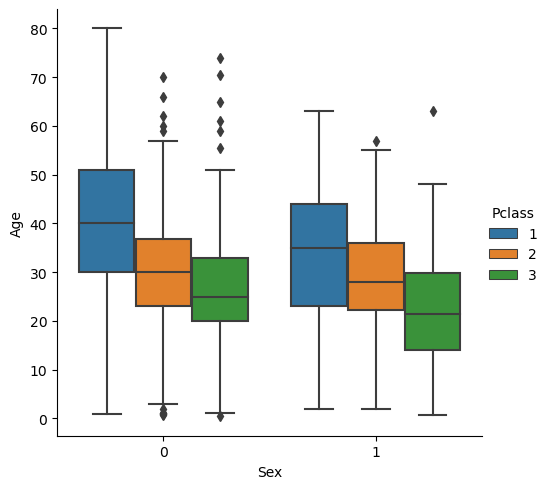

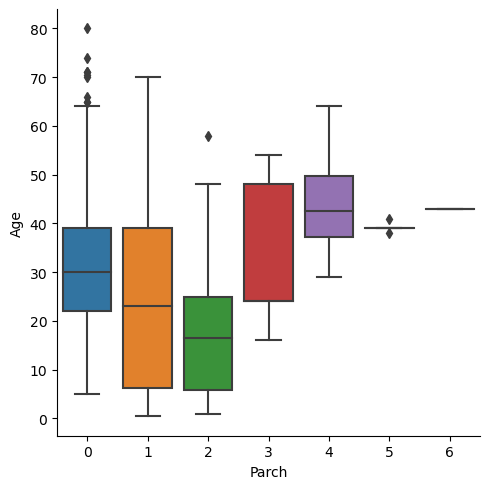

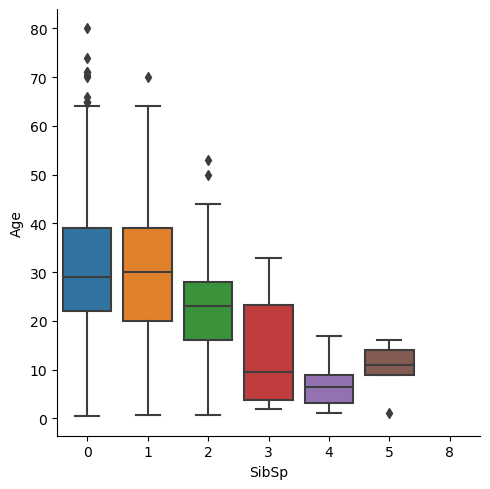

In [ ]:
sns.factorplot(y= 'Age', x='Sex', hue= 'Pclass', kind='box', data=df)
sns.factorplot(y= 'Age', x='Parch', kind= 'box', data=df)
sns.factorplot(y= 'Age', x='SibSp', kind= 'box',data=df)

In [64]:
df.drop(['Survived', 'Name', 'PassengerId', 'Fare'], axis =1).corr()

,Pclass,Age,SibSp,Parch,cabin_multiple,numeric_ticket
Pclass,1.000000,-0.369226,0.083081,0.018443,-0.647116,0.079763
Age,-0.369226,1.000000,-0.308247,-0.189119,0.172708,-0.029886
SibSp,0.083081,-0.308247,1.000000,0.414838,0.012150,-0.080768
Parch,0.018443,-0.189119,0.414838,1.000000,0.127846,-0.035762
cabin_multiple,-0.647116,0.172708,0.012150,0.127846,1.000000,-0.026093
numeric_ticket,0.079763,-0.029886,-0.080768,-0.035762,-0.026093,1.000000


<AxesSubplot:>

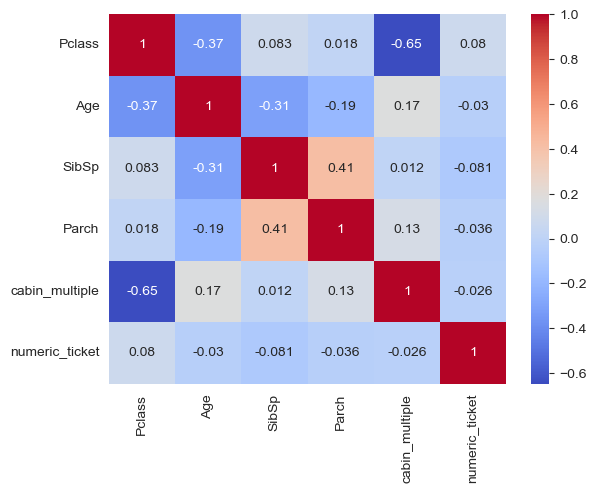

In [67]:
sns.heatmap(df.drop(['Survived', 'Name', 'PassengerId', 'Fare'], axis =1).corr(), annot= True, cmap = 'coolwarm')

In [66]:
#Identifying missing values of Age

age_nan_indices = list(df[df['Age'].isnull()].index)
len(age_nan_indices)

177

In [70]:
#Applying loop through list and impute missing ages

for index in age_nan_indices:
    median_age= df['Age'].median()
    predict_age = df['Age'][(df['SibSp']== df.iloc[index]['SibSp'])
                            & (df['Parch'] == df.iloc[index]['Parch'])
                            & (df['Pclass'] == df.iloc[index]['Pclass'])].median()
    
    if np.isnan(predict_age):
        df['Age'].iloc[index] = median_age
    else:
        df['Age'].iloc[index] = predict_age

C:\Users\Gihan\AppData\Local\Temp\ipykernel_11252\1296287053.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Age'].iloc[index] = predict_age
C:\Users\Gihan\AppData\Local\Temp\ipykernel_11252\1296287053.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Age'].iloc[index] = median_age


In [71]:
#Analysing again to review more missing values in Age
df['Age'].isnull().sum()

0

Text(0.5, 1.0, 'Passenger Fare Distribution')

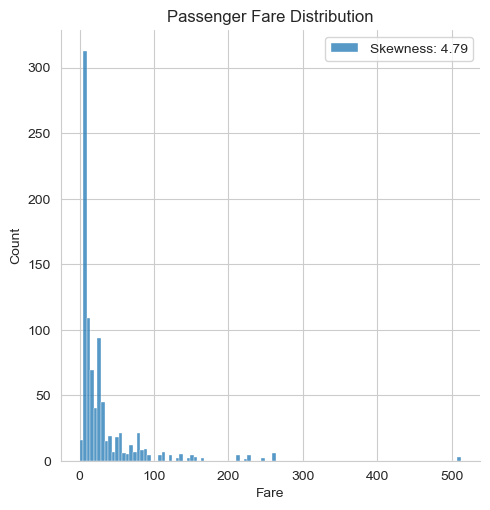

In [72]:
#Passenger Fare data distribution

sns.displot(df['Fare'],label= 'Skewness: %.2f'%(df['Fare'].skew()))
plt.legend(loc = 'best')
plt.title('Passenger Fare Distribution')

In [73]:
#Initiate log transformation to Fare column to reduce skewness

df['Fare']= df['Fare'].map(lambda x: np.log(x) if x > 0 else 0)

Text(0.5, 1.0, 'Passenger Fare Distribution After Log Transformation')

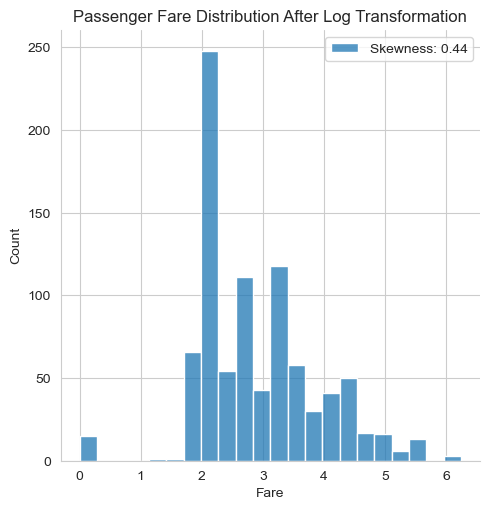

In [74]:
#Passenger fare distribution after log transformation
sns.displot(df['Fare'],label= 'Skewness: %.2f'%(df['Fare'].skew()))
plt.legend(loc = 'best')
plt.title('Passenger Fare Distribution After Log Transformation')

Engineering the Title

In [75]:
#Create a new column "Title" in the dataset and extract title

df['Title'] = [name.split(',')[1].split('.')[0].strip() for name in df['Name']]
df[['Name','Title']].head()

,Name,Title
0,"Braund, Mr. Owen Harris",Mr
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",Mrs
2,"Heikkinen, Miss. Laina",Miss
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",Mrs
4,"Allen, Mr. William Henry",Mr


In [76]:
#Value count of each title

df['Title'].value_counts()

Mr              517
Miss            182
Mrs             125
Master           40
Dr                7
Rev               6
Mlle              2
Major             2
Col               2
the Countess      1
Capt              1
Ms                1
Sir               1
Lady              1
Mme               1
Don               1
Jonkheer          1
Name: Title, dtype: int64

In [77]:
#Summerize the titles except Mr /Miss/ Mrs / Master in to category "Unique"

df['Title'] = df['Title'].replace(['Dr','Rev','Col','Major','Lady','Jonkheer', 
                                  'Don','Capt','the Countess','Sir','Dona'],'Unique')

In [78]:
#Summerize the titles Mlle/ Ms in to 'Miss'
df['Title'] = df['Title'].replace(['Mlle','Ms'], 'Miss')

In [79]:
#Summerize the titles Mme in to 'Mrs'
df['Title'] = df['Title'].replace('Mme', 'Mrs')

c:\Users\Gihan\Anaco\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Title', ylabel='count'>

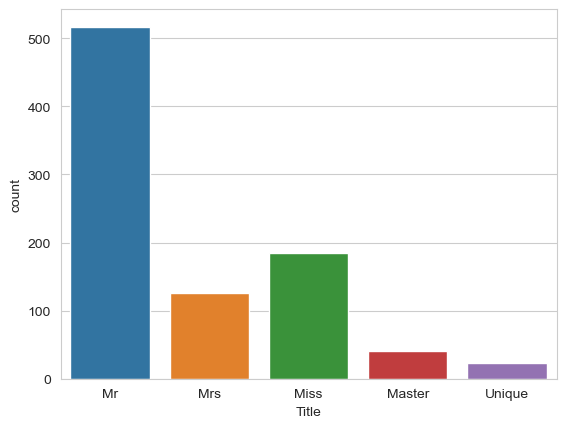

In [80]:
sns.countplot(df['Title'])

In [81]:
#Calculating the Mean of Survived by name title

df[['Title','Survived']].groupby(['Title'], as_index=False).mean().sort_values(by= 'Survived', ascending = False)

,Title,Survived
3,Mrs,0.793651
1,Miss,0.702703
0,Master,0.575000
4,Unique,0.347826
2,Mr,0.156673


c:\Users\Gihan\Anaco\lib\site-packages\seaborn\categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


Text(0.5, 1.0, 'Mean of Survival by title')

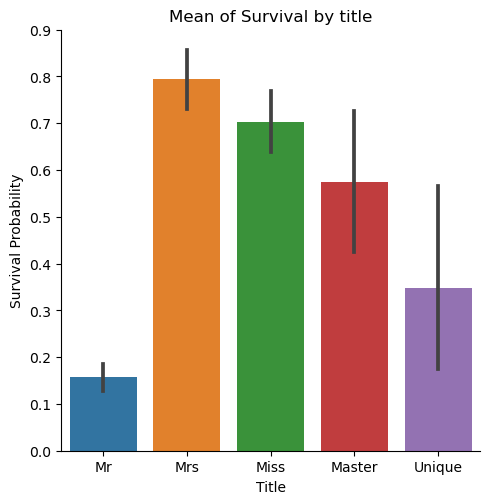

In [ ]:
sns.factorplot(x='Title', y='Survived', data = df, kind = 'bar')
plt.ylabel('Survival Probability')
plt.title('Mean of Survival by title')

In [82]:
#Since Title is identified , dropping the name column
df=df.drop('Name',axis=1)
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,cabin_multiple,cabin_adv,numeric_ticket,ticket_letters,name_title,Title
0,1,0,3,male,22.0,1,0,A/5 21171,1.981001,NaN,S,0,n,0,a5,Mr,Mr
1,2,1,1,female,38.0,1,0,PC 17599,4.266662,C85,C,1,C,0,pc,Mrs,Mrs
2,3,1,3,female,26.0,0,0,STON/O2. 3101282,2.070022,NaN,S,0,n,0,stono2,Miss,Miss
3,4,1,1,female,35.0,1,0,113803,3.972177,C123,S,1,C,1,0,Mrs,Mrs
4,5,0,3,male,35.0,0,0,373450,2.085672,NaN,S,0,n,1,0,Mr,Mr


IsAlone

In [83]:
#Calculating the family size Sibsp and Parch

df['FamilySize'] = df['SibSp'] + df['Parch'] + 1
df[['SibSp', 'Parch', 'FamilySize']].head(12)

,SibSp,Parch,FamilySize
0,1,0,2
1,1,0,2
2,0,0,1
3,1,0,2
4,0,0,1
5,0,0,1
6,0,0,1
7,3,1,5
8,0,2,3
9,1,0,2


In [84]:
#Calculating the mean of survival by family size

df[['FamilySize', 'Survived']].groupby('FamilySize', as_index = False).mean().sort_values(by= 'Survived', ascending= False)

,FamilySize,Survived
3,4,0.724138
2,3,0.578431
1,2,0.552795
6,7,0.333333
0,1,0.303538
4,5,0.200000
5,6,0.136364
7,8,0.000000
8,11,0.000000


In [85]:
#Create IsAlone feature
df['IsAlone'] = 0
df.loc[df['FamilySize'] == 1, 'IsAlone'] = 1

In [86]:
#Mean of survvival by IsAlone

df[['IsAlone','Survived']].groupby('IsAlone', as_index=False).mean().sort_values(by = 'Survived', ascending = False)

,IsAlone,Survived
0,0,0.505650
1,1,0.303538
